## 1. Import Data


In [2]:
!pip install pymongo

In [4]:
import numpy as np
import pandas as pd
import pymongo
import tensorflow
# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [5]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [7]:
db = client["Big_Data"]

In [22]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Big_Data')


In [9]:
train = db["data_train"]

In [10]:
print(train)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Big_Data'), 'data_train')


In [15]:
for row in train.find():
    print(row)

{'_id': ObjectId('645b1c4d945341bbe323dc02'), 'Emotion': 'neutral', 'Text': ' There are tons of other paintings that I think are better . '}
{'_id': ObjectId('645b1c4d945341bbe323dc03'), 'Emotion': 'sadness', 'Text': 'Yet the dog had grown old and less capable , and one day the gillie had come and explained with great sorrow that the dog had suffered a stroke , and must be put down . '}
{'_id': ObjectId('645b1c4d945341bbe323dc04'), 'Emotion': 'fear', 'Text': 'When I get into the tube or the train without paying for the ticket.'}
{'_id': ObjectId('645b1c4d945341bbe323dc05'), 'Emotion': 'fear', 'Text': 'This last may be a source of considerable disquiet and one might not at first see how such obviously ` immoral " content could be defended as part of a system of morality . '}
{'_id': ObjectId('645b1c4d945341bbe323dc06'), 'Emotion': 'anger', 'Text': 'She disliked the intimacy he showed towards some of them , was resentful of the memories they shared of which she was not a part , and felt 

{'_id': ObjectId('645b1c4d945341bbe323dcc2'), 'Emotion': 'sadness', 'Text': ' Yes , but there is nothing inside the drawers or on the desk . '}
{'_id': ObjectId('645b1c4d945341bbe323dcc3'), 'Emotion': 'neutral', 'Text': 'Are you telling us a lie again ? '}
{'_id': ObjectId('645b1c4d945341bbe323dcc4'), 'Emotion': 'anger', 'Text': 'When my boyfriend sat up half the night playing computer games with a friend.'}
{'_id': ObjectId('645b1c4d945341bbe323dcc5'), 'Emotion': 'joy', 'Text': 'I was very happy when I got the message that I had been accepted as a student in medicine.'}
{'_id': ObjectId('645b1c4d945341bbe323dcc6'), 'Emotion': 'sadness', 'Text': 'A few months a close relative of mine died.  I had never expected this to happen and was sad for a few months.'}
{'_id': ObjectId('645b1c4d945341bbe323dcc7'), 'Emotion': 'joy', 'Text': ' You can ask me any question at any time . '}
{'_id': ObjectId('645b1c4d945341bbe323dcc8'), 'Emotion': 'joy', 'Text': ' And my first nephew . He looks a lot li

{'_id': ObjectId('645b1c4d945341bbe323de5f'), 'Emotion': 'sadness', 'Text': "I'm worried sick that she might leave me one day . "}
{'_id': ObjectId('645b1c4d945341bbe323de60'), 'Emotion': 'sadness', 'Text': "It's your turn , sir . I'm sorry that you had to wait . Saturday is a busy day for us . "}
{'_id': ObjectId('645b1c4d945341bbe323de61'), 'Emotion': 'fear', 'Text': "When I was confronted by a policeman one night around 11 o'clock.  I was afraid when they threatened to take me and my girl to the gallows."}
{'_id': ObjectId('645b1c4d945341bbe323de62'), 'Emotion': 'joy', 'Text': 'When I was accepted as a student.'}
{'_id': ObjectId('645b1c4d945341bbe323de63'), 'Emotion': 'neutral', 'Text': ' Absolutely . '}
{'_id': ObjectId('645b1c4d945341bbe323de64'), 'Emotion': 'anger', 'Text': 'During the Summer, at my workplace, a person kept interfering with my tasks and making unfounded remarks.  I felt hatred for him but it stopped when I realized that he just longed for attention.'}
{'_id': Ob

{'_id': ObjectId('645b1c4d945341bbe323e064'), 'Emotion': 'fear', 'Text': 'When I was called for an Interview at Kamuzu College of Nursing.'}
{'_id': ObjectId('645b1c4d945341bbe323e065'), 'Emotion': 'sadness', 'Text': 'When my girlfriend told me that she wanted to leave me.'}
{'_id': ObjectId('645b1c4d945341bbe323e066'), 'Emotion': 'anger', 'Text': 'I was walking on a street alone in the afternoon when there were not too many people on the street.  A couple of guys were following me and I was ignoring them.  Suddenly one of them came in front of me and started using dirty language and harrassing me.  I got very angry and wanted to strike back at them.'}
{'_id': ObjectId('645b1c4d945341bbe323e067'), 'Emotion': 'fear', 'Text': 'I was afraid of moving away from home and moving to Helsinki for my studies.'}
{'_id': ObjectId('645b1c4d945341bbe323e068'), 'Emotion': 'joy', 'Text': 'I stopped working (had a boring job).'}
{'_id': ObjectId('645b1c4d945341bbe323e069'), 'Emotion': 'sadness', 'Text

{'_id': ObjectId('645b1c4d945341bbe323e1a8'), 'Emotion': 'sadness', 'Text': " Sorry , Sally , it's not your fault . "}
{'_id': ObjectId('645b1c4d945341bbe323e1a9'), 'Emotion': 'sadness', 'Text': " Oh , I'm sorry . I didn't see the stop sign at the corner . I didn't mean it . "}
{'_id': ObjectId('645b1c4d945341bbe323e1aa'), 'Emotion': 'neutral', 'Text': " I know . I've even worked up a sweat . "}
{'_id': ObjectId('645b1c4d945341bbe323e1ab'), 'Emotion': 'sadness', 'Text': 'A and I were walking along the new Asia stairway to the Chung Chi college for our lecture and I saw him with her.  He put one arm around her shoulder and laugher brightly and joyfully.  I did not dare and did not want to look, just walked by them quickly.  The interest of talking to A disappeared and I just wanted to remain silent.  But I did not want A to know and so I left him and went to F.  I should have expected this to happen.'}
{'_id': ObjectId('645b1c4d945341bbe323e1ac'), 'Emotion': 'joy', 'Text': 'I went to fe

{'_id': ObjectId('645b1c4d945341bbe323e33c'), 'Emotion': 'sadness', 'Text': 'In the event , Maman was inconsolable . '}
{'_id': ObjectId('645b1c4d945341bbe323e33d'), 'Emotion': 'neutral', 'Text': ' Kobe . '}
{'_id': ObjectId('645b1c4d945341bbe323e33e'), 'Emotion': 'neutral', 'Text': ' You are bragging again . '}
{'_id': ObjectId('645b1c4d945341bbe323e33f'), 'Emotion': 'fear', 'Text': "You 're frightened to go to sleep . "}
{'_id': ObjectId('645b1c4d945341bbe323e340'), 'Emotion': 'neutral', 'Text': " It's OK . "}
{'_id': ObjectId('645b1c4d945341bbe323e341'), 'Emotion': 'fear', 'Text': 'When I went out with my dog in a forest late at night when we were on a camping.'}
{'_id': ObjectId('645b1c4d945341bbe323e342'), 'Emotion': 'anger', 'Text': 'When I was at S.Y. Bajaj I wanted to get admission in another college and this was not easy and I felt angry. '}
{'_id': ObjectId('645b1c4d945341bbe323e343'), 'Emotion': 'fear', 'Text': 'Once sitting in the cinema, I became very anxious (watching a \

{'_id': ObjectId('645b1c4d945341bbe323e4b2'), 'Emotion': 'sadness', 'Text': 'Very likely he was simply lying on his bed in a state of dejection and , perhaps , of remorse for his massacre of " the possessions " which was now generally thought not to have been necessary . '}
{'_id': ObjectId('645b1c4d945341bbe323e4b3'), 'Emotion': 'anger', 'Text': 'When I got caught in the pouring rain last Thursday and did not have a raincoat on me.'}
{'_id': ObjectId('645b1c4d945341bbe323e4b4'), 'Emotion': 'sadness', 'Text': " We're sorry you have to leave . "}
{'_id': ObjectId('645b1c4d945341bbe323e4b5'), 'Emotion': 'neutral', 'Text': ' Mr . : Yes ? '}
{'_id': ObjectId('645b1c4d945341bbe323e4b6'), 'Emotion': 'neutral', 'Text': ' Why not ? '}
{'_id': ObjectId('645b1c4d945341bbe323e4b7'), 'Emotion': 'joy', 'Text': 'When I spoke to my daughter and wished her luck for the examinations she was about to take.'}
{'_id': ObjectId('645b1c4d945341bbe323e4b8'), 'Emotion': 'anger', 'Text': " I don't care . "}
{'

{'_id': ObjectId('645b1c4d945341bbe323e604'), 'Emotion': 'sadness', 'Text': 'Our son is gone and my heart is gone too . I don ’ t know how to spend the rest of my years . '}
{'_id': ObjectId('645b1c4d945341bbe323e605'), 'Emotion': 'fear', 'Text': "A lot of people's biggest is #death and a lot of others is #clowns.. My biggest fear... Death by Clowns! There's nothing scarier!"}
{'_id': ObjectId('645b1c4d945341bbe323e606'), 'Emotion': 'neutral', 'Text': ' Sure . '}
{'_id': ObjectId('645b1c4d945341bbe323e607'), 'Emotion': 'sadness', 'Text': "When I became conscious that men don't wnat anything they don't have a goal. They have: sex, but this isn't important."}
{'_id': ObjectId('645b1c4d945341bbe323e608'), 'Emotion': 'neutral', 'Text': ' Take it easy , all sufferings have their reward . '}
{'_id': ObjectId('645b1c4d945341bbe323e609'), 'Emotion': 'anger', 'Text': ' my computer just crashed again for the third time today ! '}
{'_id': ObjectId('645b1c4d945341bbe323e60a'), 'Emotion': 'neutral'

{'_id': ObjectId('645b1c4e945341bbe323e7e7'), 'Emotion': 'joy', 'Text': ' See you then . '}
{'_id': ObjectId('645b1c4e945341bbe323e7e8'), 'Emotion': 'sadness', 'Text': "Sven Hjerson 's lugubrious face lit up in a brief smile . "}
{'_id': ObjectId('645b1c4e945341bbe323e7e9'), 'Emotion': 'sadness', 'Text': 'Saying goodbye to a friend.'}
{'_id': ObjectId('645b1c4e945341bbe323e7ea'), 'Emotion': 'anger', 'Text': ' Dammit ! I asked for sunny side up ! How many times do I have to tell you . '}
{'_id': ObjectId('645b1c4e945341bbe323e7eb'), 'Emotion': 'fear', 'Text': "My friend and I had offended our classmate unintentionally.  We wanted to apologize to her so we decided to visit her.  We knew that she was stubborn so we were frightened.  When we rang her door bell, our fear was at it's climax"}
{'_id': ObjectId('645b1c4e945341bbe323e7ec'), 'Emotion': 'neutral', 'Text': ' Laptop . '}
{'_id': ObjectId('645b1c4e945341bbe323e7ed'), 'Emotion': 'sadness', 'Text': 'There are periods when we feel tota

{'_id': ObjectId('645b1c4e945341bbe323e9e7'), 'Emotion': 'anger', 'Text': 'When my mother kept me in leading-strings.'}
{'_id': ObjectId('645b1c4e945341bbe323e9e8'), 'Emotion': 'fear', 'Text': 'Once while walking along a hill; I fell down out of carelessness and I broke my left arm.'}
{'_id': ObjectId('645b1c4e945341bbe323e9e9'), 'Emotion': 'anger', 'Text': 'When I am accused of something I have not done, I get unbelievably angry.'}
{'_id': ObjectId('645b1c4e945341bbe323e9ea'), 'Emotion': 'neutral', 'Text': ' Of course . '}
{'_id': ObjectId('645b1c4e945341bbe323e9eb'), 'Emotion': 'neutral', 'Text': ' You too . '}
{'_id': ObjectId('645b1c4e945341bbe323e9ec'), 'Emotion': 'neutral', 'Text': ' Excuse me ? '}
{'_id': ObjectId('645b1c4e945341bbe323e9ed'), 'Emotion': 'joy', 'Text': ' Very nice . '}
{'_id': ObjectId('645b1c4e945341bbe323e9ee'), 'Emotion': 'joy', 'Text': 'FOR months now I have been trying to contain excitement at the thought of the compact disc . '}
{'_id': ObjectId('645b1c4e94

{'_id': ObjectId('645b1c4e945341bbe323eb78'), 'Emotion': 'joy', 'Text': 'At a party in which I met an interesting female. We enjoyed eachothers company, while slow dancing.'}
{'_id': ObjectId('645b1c4e945341bbe323eb79'), 'Emotion': 'sadness', 'Text': 'I was not chosen for the All English class.'}
{'_id': ObjectId('645b1c4e945341bbe323eb7a'), 'Emotion': 'joy', 'Text': ' I am feeling very positive .'}
{'_id': ObjectId('645b1c4e945341bbe323eb7b'), 'Emotion': 'neutral', 'Text': "Where's Bob ? "}
{'_id': ObjectId('645b1c4e945341bbe323eb7c'), 'Emotion': 'sadness', 'Text': "My paternal grandmother had died. We weren't close but she was blood. I didn't cry but I was sad, partly due to her death and partly I think, due to the fact that I could not / did not cry."}
{'_id': ObjectId('645b1c4e945341bbe323eb7d'), 'Emotion': 'sadness', 'Text': 'During the funeral of my grandmother, when I saw my mother and other family members crying.'}
{'_id': ObjectId('645b1c4e945341bbe323eb7e'), 'Emotion': 'sadne

{'_id': ObjectId('645b1c4e945341bbe323ed9f'), 'Emotion': 'sadness', 'Text': 'When my first boyfriend left me. I tried not to let him understand I felt miserable.'}
{'_id': ObjectId('645b1c4e945341bbe323eda0'), 'Emotion': 'fear', 'Text': 'He is so anxious about being accepted that he is trying to be extra good and even perfect . " '}
{'_id': ObjectId('645b1c4e945341bbe323eda1'), 'Emotion': 'neutral', 'Text': ' Thanks . '}
{'_id': ObjectId('645b1c4e945341bbe323eda2'), 'Emotion': 'neutral', 'Text': " I'll try ; it's hard ! "}
{'_id': ObjectId('645b1c4e945341bbe323eda3'), 'Emotion': 'joy', 'Text': "After a one year's stay abroad, I returned home. I was even more glad to see how much my family was pleased to see me."}
{'_id': ObjectId('645b1c4e945341bbe323eda4'), 'Emotion': 'sadness', 'Text': 'A disconsolate group of climbers sitting round a kitchen table all lean forward and peer out at the iron-grey clouds rumbling past . '}
{'_id': ObjectId('645b1c4e945341bbe323eda5'), 'Emotion': 'joy', 

{'_id': ObjectId('645b1c4e945341bbe323ef16'), 'Emotion': 'fear', 'Text': 'To live your  in the of losing it is to lose the point of life.” — Malcolm #Forbes'}
{'_id': ObjectId('645b1c4e945341bbe323ef17'), 'Emotion': 'anger', 'Text': 'My mother and I had an argument over buying some clothes for me.  She did not accept the fact that I did not like the same things as her, and we ended up shouting at each other.'}
{'_id': ObjectId('645b1c4e945341bbe323ef18'), 'Emotion': 'fear', 'Text': 'When I was chased by a big dog near my house.'}
{'_id': ObjectId('645b1c4e945341bbe323ef19'), 'Emotion': 'anger', 'Text': 'When my mother treats me as a 10-year old boy.'}
{'_id': ObjectId('645b1c4e945341bbe323ef1a'), 'Emotion': 'joy', 'Text': 'Boy ! What a beauty ! I fall in love with her at the first sight . '}
{'_id': ObjectId('645b1c4e945341bbe323ef1b'), 'Emotion': 'sadness', 'Text': " Sorry , Mum , I'll lock it right away . "}
{'_id': ObjectId('645b1c4e945341bbe323ef1c'), 'Emotion': 'fear', 'Text': 'He

{'_id': ObjectId('645b1c4e945341bbe323ef76'), 'Emotion': 'fear', 'Text': 'As a food and store safety officer , I felt dismayed and frustrated to see in the Journal , members of staff wearing inappropriate jewellery and , in high risk areas , all hair not kept within hats . '}
{'_id': ObjectId('645b1c4e945341bbe323ef77'), 'Emotion': 'sadness', 'Text': ' Yes . I had a bad traffic accident.Look , my car looks like a squashed coke can . '}
{'_id': ObjectId('645b1c4e945341bbe323ef78'), 'Emotion': 'sadness', 'Text': "When one's studies seem hopelessly difficult and uninteresting.  "}
{'_id': ObjectId('645b1c4e945341bbe323ef79'), 'Emotion': 'joy', 'Text': 'The day I was told that I had been accepted as a student of economics.'}
{'_id': ObjectId('645b1c4e945341bbe323ef7a'), 'Emotion': 'neutral', 'Text': ' Where ? '}
{'_id': ObjectId('645b1c4e945341bbe323ef7b'), 'Emotion': 'anger', 'Text': 'When I got low marks in B.Sc final.'}
{'_id': ObjectId('645b1c4e945341bbe323ef7c'), 'Emotion': 'sadness',

{'_id': ObjectId('645b1c4e945341bbe323f020'), 'Emotion': 'anger', 'Text': 'Of course Ed was really peeved about how Martinez handled the whole Harley business . '}
{'_id': ObjectId('645b1c4e945341bbe323f021'), 'Emotion': 'anger', 'Text': ' Really ? Who made that rule up ? '}
{'_id': ObjectId('645b1c4e945341bbe323f022'), 'Emotion': 'neutral', 'Text': ' Oh , OK . '}
{'_id': ObjectId('645b1c4e945341bbe323f023'), 'Emotion': 'joy', 'Text': 'When I passed the B.A exams and my parents allowed me to carry on my studies and do a M.A. , I was very happy.'}
{'_id': ObjectId('645b1c4e945341bbe323f024'), 'Emotion': 'joy', 'Text': " That's right "}
{'_id': ObjectId('645b1c4e945341bbe323f025'), 'Emotion': 'anger', 'Text': ' how dare you ! '}
{'_id': ObjectId('645b1c4e945341bbe323f026'), 'Emotion': 'joy', 'Text': " Let's stop the car and enjoy it for a minute . "}
{'_id': ObjectId('645b1c4e945341bbe323f027'), 'Emotion': 'joy', 'Text': 'The first time I really fell in love with a girl.'}
{'_id': Object

{'_id': ObjectId('645b1c4e945341bbe323f159'), 'Emotion': 'anger', 'Text': 'The Doctor looked offended . '}
{'_id': ObjectId('645b1c4e945341bbe323f15a'), 'Emotion': 'sadness', 'Text': 'I had had a farewell party at the place where I had been working for a year.  That night I could not fall off to sleep.  I was sad thinking that I would not see my nice fellow workers again.'}
{'_id': ObjectId('645b1c4e945341bbe323f15b'), 'Emotion': 'fear', 'Text': 'When I whatched a horror film on a Friday 13th.'}
{'_id': ObjectId('645b1c4e945341bbe323f15c'), 'Emotion': 'neutral', 'Text': " Good . After Stars.com starts paying us , we won't need Vikam's cash anymore . "}
{'_id': ObjectId('645b1c4e945341bbe323f15d'), 'Emotion': 'joy', 'Text': " Yes , I'd love to.Here is a good one , Mozart and Beethoven.It ' s on the Festival Hall.Shall we go there ? "}
{'_id': ObjectId('645b1c4e945341bbe323f15e'), 'Emotion': 'neutral', 'Text': ' I was sick . '}
{'_id': ObjectId('645b1c4e945341bbe323f15f'), 'Emotion': 'an

{'_id': ObjectId('645b1c4e945341bbe323f252'), 'Emotion': 'anger', 'Text': 'When after a lot of provocation my child threw a plate on the floor.'}
{'_id': ObjectId('645b1c4e945341bbe323f253'), 'Emotion': 'fear', 'Text': 'I had been watching a TV-program on paranormal phenomena.  At night I could not fall off to sleep as I feared that humanoids were on the move.'}
{'_id': ObjectId('645b1c4e945341bbe323f254'), 'Emotion': 'sadness', 'Text': ' Sorry , Mr . Polly . '}
{'_id': ObjectId('645b1c4e945341bbe323f255'), 'Emotion': 'anger', 'Text': 'Mad at my dad.'}
{'_id': ObjectId('645b1c4e945341bbe323f256'), 'Emotion': 'joy', 'Text': "The army hadn't been too pleased about that little episode either . "}
{'_id': ObjectId('645b1c4e945341bbe323f257'), 'Emotion': 'anger', 'Text': ' You won ’ t believe who ’ s been elected to do overtime on the Baker account ! Me ! I ’ Ve already logged in 20 hours of overtime ! '}
{'_id': ObjectId('645b1c4e945341bbe323f258'), 'Emotion': 'neutral', 'Text': " I'm not 

{'_id': ObjectId('645b1c4e945341bbe323f415'), 'Emotion': 'neutral', 'Text': 'After you . '}
{'_id': ObjectId('645b1c4e945341bbe323f416'), 'Emotion': 'neutral', 'Text': ' Weight ? '}
{'_id': ObjectId('645b1c4e945341bbe323f417'), 'Emotion': 'anger', 'Text': 'Emily , what kind of report is this ? '}
{'_id': ObjectId('645b1c4e945341bbe323f418'), 'Emotion': 'anger', 'Text': 'To her annoyance a warm blush was steadily creeping into her cheeks . '}
{'_id': ObjectId('645b1c4e945341bbe323f419'), 'Emotion': 'anger', 'Text': 'Physical violence. A friend wouldn\'t listen to me I repeatedly tried to warn him, to no avail. Result: eight people were \\pissed off\\"."'}
{'_id': ObjectId('645b1c4e945341bbe323f41a'), 'Emotion': 'fear', 'Text': 'Once I had to go home on foot at 5 a.m. I had to pass through a forest and I was going alone.'}
{'_id': ObjectId('645b1c4e945341bbe323f41b'), 'Emotion': 'anger', 'Text': ' Leave me alone ! '}
{'_id': ObjectId('645b1c4e945341bbe323f41c'), 'Emotion': 'anger', 'Text

{'_id': ObjectId('645b1c4e945341bbe323f49f'), 'Emotion': 'anger', 'Text': " I've told him how to do that several times , but he's never listened to me . "}
{'_id': ObjectId('645b1c4e945341bbe323f4a0'), 'Emotion': 'fear', 'Text': 'While watching TV (a war movie), I felt a strong fear of death, threat and fear of loosing people close to me.'}
{'_id': ObjectId('645b1c4e945341bbe323f4a1'), 'Emotion': 'neutral', 'Text': ' never . '}
{'_id': ObjectId('645b1c4e945341bbe323f4a2'), 'Emotion': 'neutral', 'Text': " Didn't I ? "}
{'_id': ObjectId('645b1c4e945341bbe323f4a3'), 'Emotion': 'neutral', 'Text': " I do.We haven't watered them for quite a few days . "}
{'_id': ObjectId('645b1c4e945341bbe323f4a4'), 'Emotion': 'fear', 'Text': 'One of my fellow students had bunked field work and in my attempt to cover up for him I myself was exposed, though not directly.  We were to meet our field work supervisor and we were afraid of the consequences.'}
{'_id': ObjectId('645b1c4e945341bbe323f4a5'), 'Emotion'

{'_id': ObjectId('645b1c4e945341bbe323f5d9'), 'Emotion': 'anger', 'Text': "Israel is also miffed by Kohl 's plan to visit the walled Old City of east Jerusalem without Mayor Ehud Olmert ."}
{'_id': ObjectId('645b1c4e945341bbe323f5da'), 'Emotion': 'joy', 'Text': 'You are afraid and full of excitement at thoughts of what you might find . '}
{'_id': ObjectId('645b1c4e945341bbe323f5db'), 'Emotion': 'fear', 'Text': 'During labour when the foetal sounds became faint and there was a big alert for a forceps delivery.'}
{'_id': ObjectId('645b1c4e945341bbe323f5dc'), 'Emotion': 'joy', 'Text': "So we 're quite excited about it and also it 's quite a major problem . "}
{'_id': ObjectId('645b1c4e945341bbe323f5dd'), 'Emotion': 'fear', 'Text': 'After seeing a horror film - Omen.  I could not sleep at night  even though I closed my eyes.  The last scene of the film kept coming back to me, I seemed to hear the girls in the film shouting at the devil.  The devil did not have any expression on his face an

{'_id': ObjectId('645b1c4e945341bbe323f709'), 'Emotion': 'joy', 'Text': 'Griffin Moss is a contented artist until he receives an enigmatic note from Sabine Strohem , a stranger from a South Pacific island . '}
{'_id': ObjectId('645b1c4e945341bbe323f70a'), 'Emotion': 'joy', 'Text': 'The concert was really great . '}
{'_id': ObjectId('645b1c4e945341bbe323f70b'), 'Emotion': 'neutral', 'Text': ' See you ! '}
{'_id': ObjectId('645b1c4e945341bbe323f70c'), 'Emotion': 'fear', 'Text': "But that ain't how it works, that ain't how it goes,& i'll be getting high just to balance out the lows "}
{'_id': ObjectId('645b1c4e945341bbe323f70d'), 'Emotion': 'joy', 'Text': 'Finding out that I am not ill (not seriously).'}
{'_id': ObjectId('645b1c4e945341bbe323f70e'), 'Emotion': 'anger', 'Text': 'A colleague asked me for some advice and as he did not have enough confidence in me he asked a third person.'}
{'_id': ObjectId('645b1c4e945341bbe323f70f'), 'Emotion': 'sadness', 'Text': 'My brother is a soldier. H

{'_id': ObjectId('645b1c4e945341bbe323f7d5'), 'Emotion': 'fear', 'Text': 'A fall during a climb, with almost with no previous experience.'}
{'_id': ObjectId('645b1c4e945341bbe323f7d6'), 'Emotion': 'neutral', 'Text': ' sure , I have a part-time job as a bartender . '}
{'_id': ObjectId('645b1c4e945341bbe323f7d7'), 'Emotion': 'neutral', 'Text': ' Try me . '}
{'_id': ObjectId('645b1c4e945341bbe323f7d8'), 'Emotion': 'neutral', 'Text': ' What ? '}
{'_id': ObjectId('645b1c4e945341bbe323f7d9'), 'Emotion': 'anger', 'Text': ' What did you think you were doing ? '}
{'_id': ObjectId('645b1c4e945341bbe323f7da'), 'Emotion': 'joy', 'Text': "And , remember , as with all our offers , we guarantee to refund your money if you 're not delighted with your purchase . "}
{'_id': ObjectId('645b1c4e945341bbe323f7db'), 'Emotion': 'anger', 'Text': ' I ’ m definitely taking them to court . '}
{'_id': ObjectId('645b1c4e945341bbe323f7dc'), 'Emotion': 'fear', 'Text': "Hate snakes so much can't even watch them on tv 

{'_id': ObjectId('645b1c4e945341bbe323f9b5'), 'Emotion': 'sadness', 'Text': 'I heard of the death of a closefriend of mine.  I had gone camping with him shortly before his death and the whole thing seemed very  sudden to me. '}
{'_id': ObjectId('645b1c4e945341bbe323f9b6'), 'Emotion': 'sadness', 'Text': 'It made me very sad to hear that some construction company was going to build houses on the beautiful hills by my house.'}
{'_id': ObjectId('645b1c4e945341bbe323f9b7'), 'Emotion': 'sadness', 'Text': 'When I think that I will probably never have a genuine contact with my parents.'}
{'_id': ObjectId('645b1c4e945341bbe323f9b8'), 'Emotion': 'neutral', 'Text': ' OK . '}
{'_id': ObjectId('645b1c4e945341bbe323f9b9'), 'Emotion': 'sadness', 'Text': 'When one of my closest friends failed to make it to the third year of university.'}
{'_id': ObjectId('645b1c4e945341bbe323f9ba'), 'Emotion': 'anger', 'Text': 'Topaz was indignant , some of her fear dissipating . '}
{'_id': ObjectId('645b1c4e945341bbe

In [16]:
train_list = list(train.find())

In [18]:
data_train = pd.DataFrame(train_list)

In [19]:
data_train.head()

,_id,Emotion,Text
0,645b1c4d945341bbe323dc02,neutral,There are tons of other paintings that I thin...
1,645b1c4d945341bbe323dc03,sadness,"Yet the dog had grown old and less capable , a..."
2,645b1c4d945341bbe323dc04,fear,When I get into the tube or the train without ...
3,645b1c4d945341bbe323dc05,fear,This last may be a source of considerable disq...
4,645b1c4d945341bbe323dc06,anger,She disliked the intimacy he showed towards so...


In [20]:
data_train = data_train.drop(columns=["_id"])

In [21]:
data_train.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [23]:
test = db["data_test"]

In [24]:
print(test)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Big_Data'), 'data_test')


In [25]:
for row in test.find():
    print(row)

{'_id': ObjectId('645b1c61945341bbe323fb01'), 'Emotion': 'sadness', 'Text': 'I experienced this emotion when my grandfather passed away.'}
{'_id': ObjectId('645b1c61945341bbe323fb02'), 'Emotion': 'neutral', 'Text': ' when I first moved in , I walked everywhere . But within a week , I had my purse stolen — just a block away from the police station ! Now , I always take public transportation . '}
{'_id': ObjectId('645b1c61945341bbe323fb03'), 'Emotion': 'anger', 'Text': '` Oh ! " she bleated , her voice high and rather indignant . '}
{'_id': ObjectId('645b1c61945341bbe323fb04'), 'Emotion': 'fear', 'Text': 'However , does the right hon. Gentleman recognise that profound disquiet has been expressed about some of the proposals in the Bill , particularly the fast-track ones ? '}
{'_id': ObjectId('645b1c61945341bbe323fb05'), 'Emotion': 'sadness', 'Text': "My boyfriend didn't turn up after promising that he was coming."}
{'_id': ObjectId('645b1c61945341bbe323fb06'), 'Emotion': 'neutral', 'Text'

{'_id': ObjectId('645b1c61945341bbe323fc34'), 'Emotion': 'fear', 'Text': 'She jumped up , frowning in dismay . '}
{'_id': ObjectId('645b1c61945341bbe323fc35'), 'Emotion': 'anger', 'Text': 'I was accused of a misdemeanour, unjustly.'}
{'_id': ObjectId('645b1c61945341bbe323fc36'), 'Emotion': 'fear', 'Text': 'There was one other horrified observer of the scene . '}
{'_id': ObjectId('645b1c61945341bbe323fc37'), 'Emotion': 'anger', 'Text': 'I felt anger when I had a fight with my father, and he beated me. My mother came to help me (because I was beeing beated) and he also beated my mother.'}
{'_id': ObjectId('645b1c61945341bbe323fc38'), 'Emotion': 'joy', 'Text': " Oh , Penny , I'm Leonard , glad to meet you . "}
{'_id': ObjectId('645b1c61945341bbe323fc39'), 'Emotion': 'anger', 'Text': 'Quarreling with classmates.'}
{'_id': ObjectId('645b1c61945341bbe323fc3a'), 'Emotion': 'sadness', 'Text': ' Too bad . But , is there any other leather store nearby ? '}
{'_id': ObjectId('645b1c61945341bbe323f

{'_id': ObjectId('645b1c61945341bbe323fe2e'), 'Emotion': 'neutral', 'Text': ' Does that mean studying all the time ? '}
{'_id': ObjectId('645b1c61945341bbe323fe2f'), 'Emotion': 'fear', 'Text': 'I was going to knock down a pedestrian with my car.'}
{'_id': ObjectId('645b1c61945341bbe323fe30'), 'Emotion': 'fear', 'Text': 'I was on my surf ski. Rather large waves to strong current separated me from my ski and we both began to drift slowly (actually rather quickly) away to sea. The direction I was drifting in was taking me straight over a reef on which rather large sharks were constantly being caught. (I was alone with no one to help me).'}
{'_id': ObjectId('645b1c61945341bbe323fe31'), 'Emotion': 'anger', 'Text': ' Anthony , you were caught making international calls from the office phone , you called in sick in eight times this month and you smell like alcohol ! '}
{'_id': ObjectId('645b1c61945341bbe323fe32'), 'Emotion': 'anger', 'Text': 'Oh . I just wanted you to shut up . You were off-k

{'_id': ObjectId('645b1c61945341bbe323ffdc'), 'Emotion': 'sadness', 'Text': 'I experienced this when my maternal grandmother passed away.  She was the last of my grand parents to pass away.'}
{'_id': ObjectId('645b1c61945341bbe323ffdd'), 'Emotion': 'joy', 'Text': " I'm glad that you see it that way . "}
{'_id': ObjectId('645b1c61945341bbe323ffde'), 'Emotion': 'joy', 'Text': "Honestly , I 'm really happy for you ! "}
{'_id': ObjectId('645b1c61945341bbe323ffdf'), 'Emotion': 'sadness', 'Text': 'My grandmother died suddenly last summer.'}
{'_id': ObjectId('645b1c61945341bbe323ffe0'), 'Emotion': 'neutral', 'Text': " I'm sorry . "}
{'_id': ObjectId('645b1c61945341bbe323ffe1'), 'Emotion': 'joy', 'Text': " Happy Mother's Day to you , Mum ! "}
{'_id': ObjectId('645b1c61945341bbe323ffe2'), 'Emotion': 'joy', 'Text': 'When my child was born.'}
{'_id': ObjectId('645b1c61945341bbe323ffe3'), 'Emotion': 'anger', 'Text': 'Did you hear what she said to me ? '}
{'_id': ObjectId('645b1c61945341bbe323ffe4'

{'_id': ObjectId('645b1c61945341bbe3240097'), 'Emotion': 'sadness', 'Text': 'Depression flattens the voice almost to monotony ; movement is slowed , and a dejected facial expression is characteristic of many people when they are in a low mood . '}
{'_id': ObjectId('645b1c61945341bbe3240098'), 'Emotion': 'fear', 'Text': "Thunder and lightning used to scare the shit out of me when I was young. I remembered watching Blue's Clues and the power went out. "}
{'_id': ObjectId('645b1c61945341bbe3240099'), 'Emotion': 'fear', 'Text': "I hate wanting to give my all but not knowing if i'll get it back "}
{'_id': ObjectId('645b1c61945341bbe324009a'), 'Emotion': 'neutral', 'Text': ' I will . '}
{'_id': ObjectId('645b1c61945341bbe324009b'), 'Emotion': 'joy', 'Text': 'When I was with the girl I love very much, for the graduatiion ball.'}
{'_id': ObjectId('645b1c61945341bbe324009c'), 'Emotion': 'sadness', 'Text': " I know , I'm sorry . "}
{'_id': ObjectId('645b1c61945341bbe324009d'), 'Emotion': 'sadnes

{'_id': ObjectId('645b1c61945341bbe3240242'), 'Emotion': 'anger', 'Text': 'When I was deputy manager during the Summer, certain deputies took liberties, more than what was normal.'}
{'_id': ObjectId('645b1c61945341bbe3240243'), 'Emotion': 'anger', 'Text': 'It was after noon by the time we actually got sorted , much to the annoyance of the lady from the Public Relations company who had hired us . '}
{'_id': ObjectId('645b1c61945341bbe3240244'), 'Emotion': 'sadness', 'Text': 'Last year, when I took the college entrance examinations I failed the FUVEST. It was for me the most frustrating situation because I had studied all year long, and only thought about this.'}
{'_id': ObjectId('645b1c61945341bbe3240245'), 'Emotion': 'joy', 'Text': 'But a dry day would bring bigger crowds and add to the excitement of the vital third round of the tournament . '}
{'_id': ObjectId('645b1c61945341bbe3240246'), 'Emotion': 'fear', 'Text': 'When I was at a boarding school, the Rhodesian soldiers came to bomb 

{'_id': ObjectId('645b1c61945341bbe3240375'), 'Emotion': 'joy', 'Text': " Thanks . I'd love to . What time is the show ? "}
{'_id': ObjectId('645b1c61945341bbe3240376'), 'Emotion': 'neutral', 'Text': ' Yes . '}
{'_id': ObjectId('645b1c61945341bbe3240377'), 'Emotion': 'anger', 'Text': 'She spoke quietly in Greek to the boy , soothing his annoyance at the turning off of the video . '}
{'_id': ObjectId('645b1c61945341bbe3240378'), 'Emotion': 'neutral', 'Text': " She's my grandma . "}
{'_id': ObjectId('645b1c61945341bbe3240379'), 'Emotion': 'joy', 'Text': 'Auguste sat in the small balcony with his mother and father , for once not noticing the unaccustomed of their best clothes , so excited were they . '}
{'_id': ObjectId('645b1c61945341bbe324037a'), 'Emotion': 'fear', 'Text': 'When I was told that the form five results were out.'}
{'_id': ObjectId('645b1c61945341bbe324037b'), 'Emotion': 'neutral', 'Text': ' Yes . '}
{'_id': ObjectId('645b1c61945341bbe324037c'), 'Emotion': 'fear', 'Text': '

{'_id': ObjectId('645b1c61945341bbe32404d8'), 'Emotion': 'joy', 'Text': 'My best friend chosen for your English lectures.'}
{'_id': ObjectId('645b1c61945341bbe32404d9'), 'Emotion': 'neutral', 'Text': ' You mean I am groaned a few words ? '}
{'_id': ObjectId('645b1c61945341bbe32404da'), 'Emotion': 'sadness', 'Text': 'My grandmother died during Christmas break several years ago.'}
{'_id': ObjectId('645b1c61945341bbe32404db'), 'Emotion': 'anger', 'Text': 'Some classmates said I did not do enough social work. Therefore I was not elected as a \\Tree Good\\" student."'}
{'_id': ObjectId('645b1c61945341bbe32404dc'), 'Emotion': 'neutral', 'Text': ' Yes . '}
{'_id': ObjectId('645b1c61945341bbe32404dd'), 'Emotion': 'fear', 'Text': 'When I am alone at night after having read horror stories, and then I heard unexplainable noises.'}
{'_id': ObjectId('645b1c61945341bbe32404de'), 'Emotion': 'joy', 'Text': ' Yes . I have . I liked it very much . Like you , I was very impressed with Rachel ’ s performa

{'_id': ObjectId('645b1c61945341bbe32405a2'), 'Emotion': 'sadness', 'Text': 'Finding out that my best friend could not go to university.'}
{'_id': ObjectId('645b1c61945341bbe32405a3'), 'Emotion': 'fear', 'Text': 'Unknown person knocking repeatedly on backdoor when no one else was at home.'}
{'_id': ObjectId('645b1c61945341bbe32405a4'), 'Emotion': 'sadness', 'Text': 'I lost all my lottery winnings playing the stock market . '}
{'_id': ObjectId('645b1c61945341bbe32405a5'), 'Emotion': 'anger', 'Text': 'The last day of school is traditionally celebrated by singing a song about all the students who are leaving.  In the song about me, there were things which irritated me a lot.'}
{'_id': ObjectId('645b1c61945341bbe32405a6'), 'Emotion': 'anger', 'Text': 'I just discovered that I owe $ 10 for a movie that I never ordered . '}
{'_id': ObjectId('645b1c61945341bbe32405a7'), 'Emotion': 'sadness', 'Text': 'She looked utterly desolate and all of her thirty-eight years ; her cheeks seemed to sag and 

{'_id': ObjectId('645b1c61945341bbe32406cc'), 'Emotion': 'anger', 'Text': ' They were supposed to , but so far nobody ’ s turned up , and I ’ m left on my own to do the work . This is the first break I ’ Ve had all day . '}
{'_id': ObjectId('645b1c61945341bbe32406cd'), 'Emotion': 'sadness', 'Text': ' I have said that we will try our best . You can trust us . But you know her situation . '}
{'_id': ObjectId('645b1c61945341bbe32406ce'), 'Emotion': 'sadness', 'Text': 'He had a narrow mournful face , tapering to a long pointed chin . '}
{'_id': ObjectId('645b1c61945341bbe32406cf'), 'Emotion': 'sadness', 'Text': 'Suddenly becoming aware of his blue gaze being levelled in her direction , she turned a smile into a cough , and promptly spilled coffee into the saucer . '}
{'_id': ObjectId('645b1c61945341bbe32406d0'), 'Emotion': 'neutral', 'Text': ' why not ? '}
{'_id': ObjectId('645b1c61945341bbe32406d1'), 'Emotion': 'sadness', 'Text': ' Yeah but , he is always in a really foul mood . I try to 

{'_id': ObjectId('645b1c61945341bbe3240730'), 'Emotion': 'fear', 'Text': "@HayleyDocherty @jamieeblack I know your joking cos it's all  in the family. Thought of drink gives me "}
{'_id': ObjectId('645b1c61945341bbe3240731'), 'Emotion': 'anger', 'Text': "Lin Foh seemed incensed , but kept his voice down as they reached the outside steps of the Coroner 's Court . "}
{'_id': ObjectId('645b1c61945341bbe3240732'), 'Emotion': 'sadness', 'Text': 'Meanwhile the dejected opposition leader , John Hewson , reacted to his crushing defeat yesterday by abandoning key policies which he had trumpeted as essential for Australia . '}
{'_id': ObjectId('645b1c61945341bbe3240733'), 'Emotion': 'sadness', 'Text': 'When I felt lack of aid from close friends.'}
{'_id': ObjectId('645b1c61945341bbe3240734'), 'Emotion': 'sadness', 'Text': 'When I quarrelled with a very close friend of mine.'}
{'_id': ObjectId('645b1c61945341bbe3240735'), 'Emotion': 'joy', 'Text': 'When people remember us and shows interest about

In [26]:
test_list = list(test.find())

In [27]:
data_test = pd.DataFrame(test_list)

In [28]:
data_test.head()

,_id,Emotion,Text
0,645b1c61945341bbe323fb01,sadness,I experienced this emotion when my grandfather...
1,645b1c61945341bbe323fb02,neutral,"when I first moved in , I walked everywhere ...."
2,645b1c61945341bbe323fb03,anger,"` Oh ! "" she bleated , her voice high and rath..."
3,645b1c61945341bbe323fb04,fear,"However , does the right hon. Gentleman recogn..."
4,645b1c61945341bbe323fb05,sadness,My boyfriend didn't turn up after promising th...


In [29]:
data_test = data_test.drop(columns=["_id"])

In [30]:
data_test.head()

,Emotion,Text
0,sadness,I experienced this emotion when my grandfather...
1,neutral,"when I first moved in , I walked everywhere ...."
2,anger,"` Oh ! "" she bleated , her voice high and rath..."
3,fear,"However , does the right hon. Gentleman recogn..."
4,sadness,My boyfriend didn't turn up after promising th...


Defining vector space dimension and fixed input size

In [3]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 5

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

Importing our training and testing datasets

In [4]:
X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)

In [5]:
print(data.Emotion.value_counts())
data.head(6)

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...


In [6]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [7]:
texts = [' '.join(clean_text(text)) for text in data.Text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [8]:
print(texts_train[92])

a bit ? I 'm extremely annoyed that he did n't phone me when he promised me that he would ! He 's such a liar .


**Tokenization + fitting using keras**

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 12087


In [10]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[    0,     0,     0, ...,   119,    51,   345],
       [    0,     0,     0, ...,    37,   277,   154],
       [    0,     0,     0, ...,    16,     2,  1210],
       ...,
       [    0,     0,     0, ...,   876,     4,   909],
       [    0,     0,     0, ...,     1,     6,   117],
       [    0,     0,     0, ..., 10258,   173,    13]], dtype=int32)

**Categorize** labels: 

In [11]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [13]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [14]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'


In [15]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(12088, 300)

In [16]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 11442
New words found: 645


In [17]:
# Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [19]:
# Parameters
gru_output_size = 128
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          3626400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               329472    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 3,957,157
Trainable params: 330,757
Non-trainable params: 3,626,400
_________________________________________________________________


In [21]:
batch_size = 128
epochs = 15

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7934 samples, validate on 3393 samples
Epoch 1/14
7934/7934 [==============================] - 178s 22ms/step - loss: 1.4235 - acc: 0.3975 - val_loss: 1.2806 - val_acc: 0.4831
Epoch 2/14
7934/7934 [==============================] - 168s 21ms/step - loss: 1.1437 - acc: 0.5441 - val_loss: 1.0423 - val_acc: 0.6021
Epoch 3/14
7934/7934 [==============================] - 173s 22ms/step - loss: 0.9415 - acc: 0.6518 - val_loss: 0.8609 - val_acc: 0.6908
Epoch 4/14
7934/7934 [==============================] - 175s 22ms/step - loss: 0.8278 - acc: 0.6952 - val_loss: 0.8196 - val_acc: 0.6970
Epoch 5/14
7934/7934 [==============================] - 173s 22ms/step - loss: 0.7671 - acc: 0.7226 - val_loss: 0.7833 - val_acc: 0.7206
Epoch 6/14
7934/7934 [==============================] - 164s 21ms/step - loss: 0.7402 - acc: 0.7349 - val_loss: 0.7720 - val_acc: 0.7200
Epoch 7/14
7934/7934 [==============================] - 163s 21ms/step - loss: 0.7

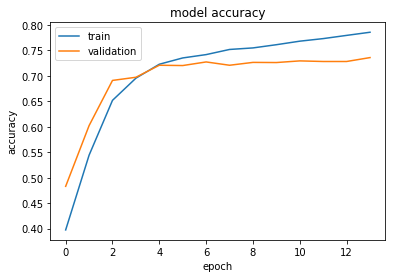

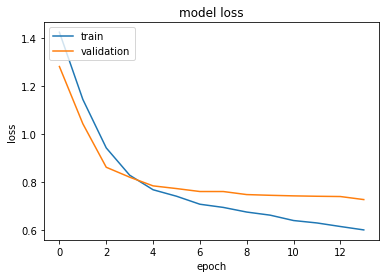

In [22]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [24]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

Accuracy: 73.56%

F1 Score: 73.56


#### Plotting confusion Matrix:

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


F1 Score: 73.56


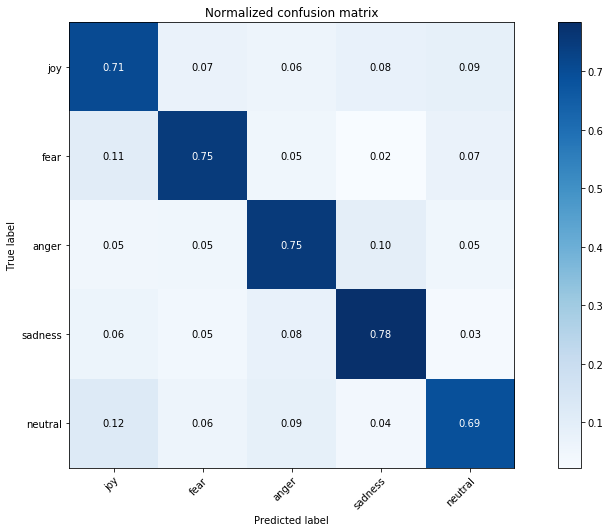

In [26]:
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

#### Lets try other inputs:

In [27]:
print('Message: {}\nPredicted: {}'.format(X_test[4], predictions[4]))

Message: My boyfriend didn't turn up after promising that he was coming.
Predicted: sadness


In [28]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: anger (0.05 seconds)


In [29]:
# creates a HDF5 file 'my_model.h5'
model.save('models/biLSTM_w2v.h5')

In [30]:
from keras.models import load_model
predictor = load_model('models/biLSTM_w2v.h5')